In [ ]:
!jupyter nbconvert --to notebook --output 'my_notebook.ipynb' my_notebook.ipynb

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
#from keras.optimizers import SGD, Adam
from tensorflow.keras.optimizers import SGD
from keras import optimizers
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.utils.np_utils import to_categorical

In [43]:
my_data = pd.read_csv('../input/az-handwritten-alphabets-in-csv-format/A_Z Handwritten Data.csv').astype('float32')
my_frame = pd.DataFrame(my_data)

In [44]:
x = my_frame.drop('0', axis = 1)
y = my_frame['0']

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
x_train = np.reshape(x_train.values, (x_train.shape[0], 28, 28))
x_test = np.reshape(x_test.values, (x_test.shape[0], 28, 28))

print('Train Data Shape:', x_train.shape)
print('Test Data Shape:', x_test.shape)

Train Data Shape: (297960, 28, 28)
Test Data Shape: (74490, 28, 28)


In [46]:
word_dict = {
    0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'
}

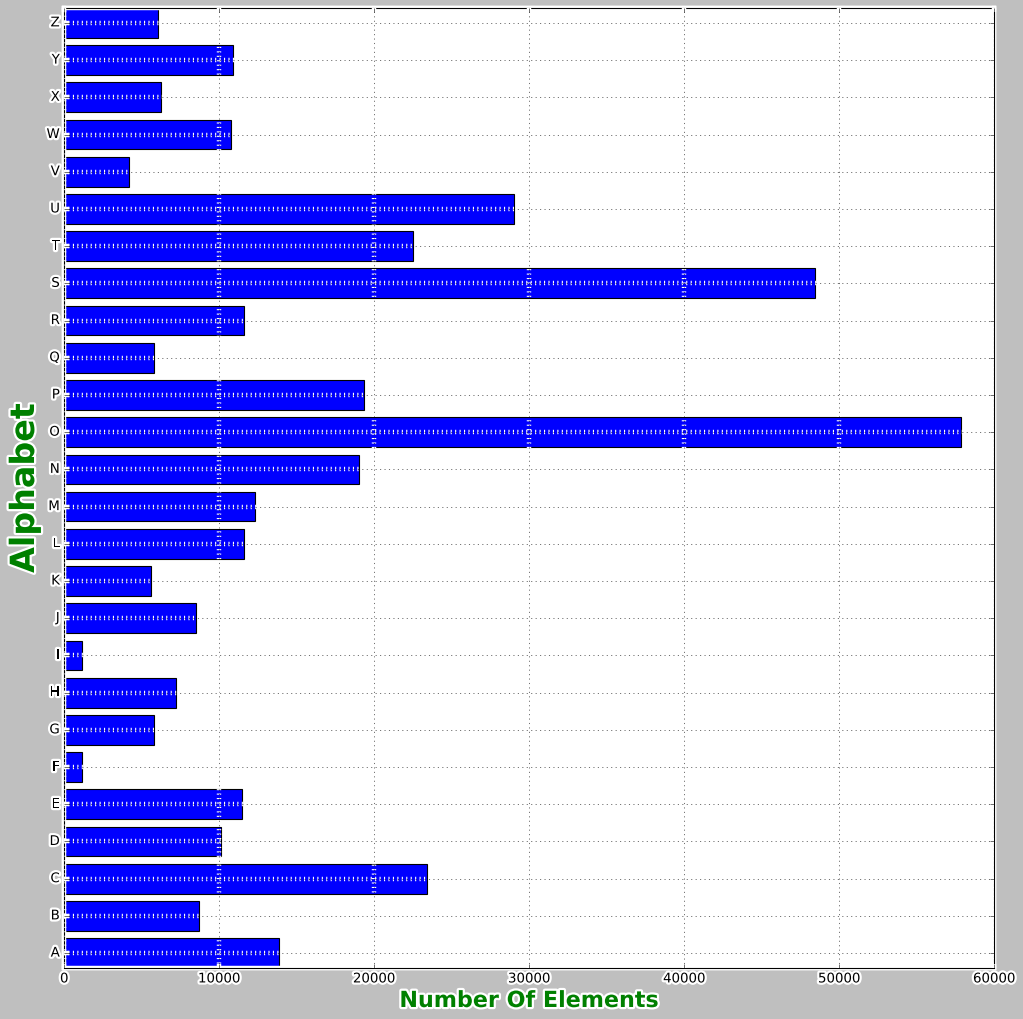

In [47]:
plt.style.use('classic')

y_integer = np.int0(y)
count = np.zeros(26, dtype = 'int')

for i in y_integer:
    count[i] += 1
    
alphabets = []

for i in word_dict.values():
    alphabets.append(i)
    
fig, ax = plt.subplots(1, 1, figsize = (15, 15))
ax.barh(alphabets, count)

plt.xlabel('Number Of Elements', fontsize = 20, fontweight = 'bold', color = 'green')
plt.ylabel('Alphabet', fontsize = 30, fontweight = 'bold', color = 'green')
plt.grid()
plt.show()

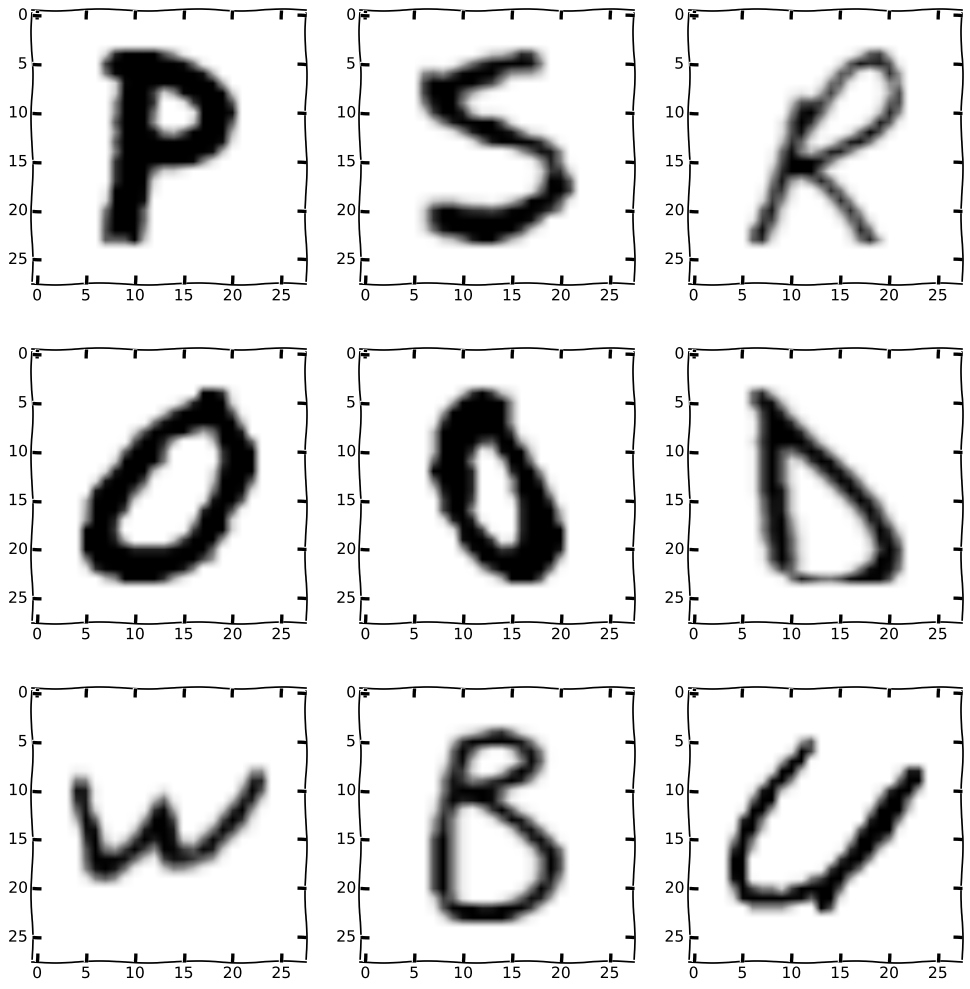

In [48]:
plt.style.use('classic')
plt.xkcd()

shuff = shuffle(x_train[:100])
fig, ax = plt.subplots(3, 3, figsize = (15, 15))
axes = ax.flatten()

for i in range(9):
    shu = cv2.threshold(shuff[i], 30, 200, cv2.THRESH_BINARY)
    axes[i].imshow(np.reshape(shuff[i], (28, 28)), cmap = 'Greys')
plt.show()


In [49]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
print("New shape of train data:", x_train.shape)

x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
print("New shape of test data:", x_test.shape)

New shape of train data: (297960, 28, 28, 1)
New shape of test data: (74490, 28, 28, 1)


In [50]:
categorical_train = to_categorical(y_train, num_classes = 26, dtype = 'int')
print("New shape of train labels:", categorical_train.shape)

categorical_test = to_categorical(y_test, num_classes = 26, dtype = 'int')
print("New shape of test labels:", categorical_test.shape)

New shape of train labels: (297960, 26)
New shape of test labels: (74490, 26)


In [51]:
my_model = Sequential()

my_model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
my_model.add(MaxPool2D(pool_size = (2, 2), strides = 2))

my_model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu', padding = 'same'))
my_model.add(MaxPool2D(pool_size = (2, 2), strides = 2))

my_model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu', padding = 'valid'))
my_model.add(MaxPool2D(pool_size = (2, 2), strides = 2))

my_model.add(Flatten())

my_model.add(Dense(64, activation = "relu"))
my_model.add(Dense(128, activation = "relu"))

my_model.add(Dense(26, activation = "softmax"))

In [52]:
my_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = my_model.fit(x_train, categorical_train, epochs = 1, validation_data = (x_test, categorical_test))
my_model.save(r'model_hand.h5')

9312/9312 [==============================] - 222s 24ms/step - loss: 0.3541 - accuracy: 0.9113 - val_loss: 0.0998 - val_accuracy: 0.9710


In [53]:
print("The training accuracy is :", history.history['accuracy'])
print("The training loss is :", history.history['loss'])

The training accuracy is : [0.956514298915863]
The training loss is : [0.1571750044822693]


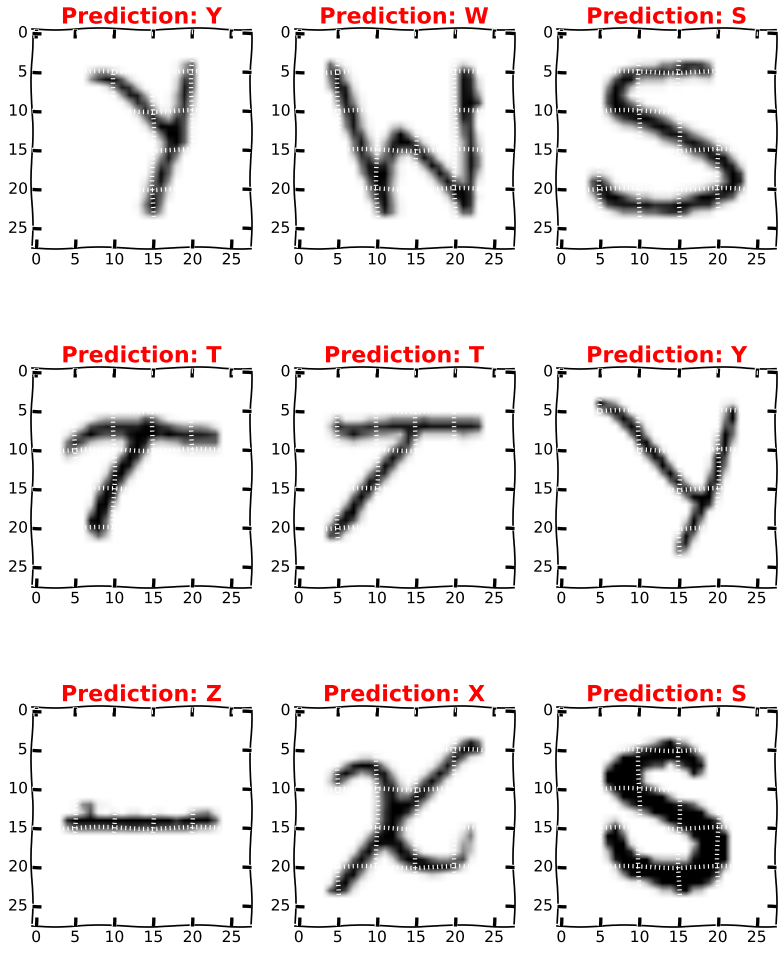

In [54]:
plt.style.use('classic')
plt.xkcd()

fig, axes = plt.subplots(3, 3, figsize = (12, 15))
axes = axes.flatten()

for i, ax in enumerate(axes):
    img = np.reshape(x_test[i], (28, 28))
    ax.imshow(img, cmap = 'Greys')
    
    pred = word_dict[np.argmax(categorical_test[i])]
    ax.set_title("Prediction: " + pred, fontsize = 20, fontweight = 'bold', color = 'red')
    ax.grid()